### Sales prediction - zadanie rekrutacyjne Allegro
Antoni Szczepanik, 15.04.2018

Treść:

Sprzedawca A handluje asortymentem w kategorii Drobne AGD. Sprzedawca A ma już historię sprzedaży dla około 200 wystawionych produktów. Biorąc pod uwagę parametry historycznych aukcji sprzedawcy A oraz agregaty danych dotyczące sprzedaży produktów na platformie allegro.pl przed wystawieniem ich przez sprzedawcę A,  należy zbudować model prodnozujący 30 dniową sprzedaż(Sztuk_sprzedanych_pierwsze_30_dni).

In [1]:
# Manipulacja danymi
import pandas as pd
import numpy as np

# Wizualizacja
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

Niestety mamy tylko 202 obserwacji na których będziemy pracować. Stąd przypuszczenie, że będziemy musieli mocno ograniczyć liczbę zmiennych. (wyjściowo 37)

In [2]:
df = pd.read_csv('data/data_raw.csv', sep=';', decimal=',')
df.head()

,id,Marka,Model,Sztuk_sprzedanych_pierwsze_30_dni,cena_wysylka30A,Data_wystawienia_aukcji,CA_NAME_5,fea_30,bld_30,hli_30,dpg_30,sa_30,48h_30,sma_30,bgn_30,top_seller_sales_30m,unique_sellers30m,sum_tr_quantity30m,sum_tr_quantity6030m,sum_tr_quantity9060m,sum_tr_quantity12090m,sum_tr_quantity150120m,sum_tr_quantity180150m,cena_z_wysylka30m,mp_fea,mp_bld,mp_hli,mp_dpg,mp_sa,mp_48h,mp_sma,mp_bgn,top3_sales_30m,ILE_AUKCJI_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_WYZSZA_CENA_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_ROWNA_CENA_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_NIZSZA_CENA_W_DNIU_DEBIUTU_FIRMA,sez_IND
0,2,babyliss,3038E,21,105.000000,05.11.2018,Lok?ki,1,1,1,0,1.0,1.000000,1,0.733333,19,5,45,23,36,23,18,40,108.650000,0.800000,0.000000,0.000000,0.000000,0.977778,1.000000,0.0,0.000000,39.0,13,13,0,0,1.514411
1,3,babyliss,6614E,27,180.000000,05.11.2018,Suszarki do w?os?,1,1,1,0,1.0,0.066667,1,0.933333,4,5,8,15,12,10,7,14,199.497500,0.500000,0.500000,0.000000,0.000000,0.875000,0.875000,0.0,0.000000,6.0,8,8,0,0,1.475193
2,7,babyliss,AS130E,40,139.000000,05.11.2018,Lok?ki,1,1,1,0,1.0,0.125000,1,0.833333,6,5,11,2,7,5,10,11,141.225454,0.090909,0.000000,0.000000,0.000000,0.909091,0.818182,0.0,0.000000,9.0,13,12,1,0,1.514411
3,8,babyliss,CurlSecret C1100E,498,306.750000,23.11.2018,Lok?ki,1,1,1,0,1.0,0.111111,1,0.000000,58,21,226,113,138,185,135,178,317.417965,0.898230,0.022124,0.146018,0.013274,0.491150,0.000000,0.0,0.261062,116.0,28,26,1,1,3.134278
4,9,babyliss,D371E,5,165.096774,05.11.2018,Suszarki do w?os?,1,1,1,0,1.0,1.000000,1,0.000000,2,2,3,1,3,0,0,0,173.326667,0.333333,0.000000,0.000000,0.000000,0.666667,1.000000,0.0,0.000000,3.0,9,8,0,1,1.475193


## Zmienne kategoryczne
Jako, że mamy tylko 4 zmienne, które Pandas traktuje jako kategoryczne zajmiemy sie nimi w pierwszej kolejności - chodzi o markę, model kategorię i o datę.

In [3]:
# Kategoria
df[['CA_NAME_5', 'Sztuk_sprzedanych_pierwsze_30_dni']].groupby(['CA_NAME_5']).mean()

,Sztuk_sprzedanych_pierwsze_30_dni
CA_NAME_5,
?elazka,62.500000
Automaty do chleba,4.000000
Czajniki,23.650000
Depilatory,34.500000
Ekspresy ci?ieniowe,13.933333
Ekspresy przelewowe,6.000000
Frytownice,5.000000
Golarki,23.941176
Grille elektryczne,80.000000


Jeżeli chodzi o kategorię, wydaje się, że nie przenosi ona żadnej wartościowej informacji. Można by rozważyć OneHotEncoding, ale on znacznie rozmnożyłby ilość zmiennych, a jednocześnie mogłby spowodować jakiś przeciek danych. Stąd po prostu decyzja o usunięciu tej zmiennej. 

In [4]:
df.drop('CA_NAME_5', inplace=True, axis=1)

In [5]:
# Marka
df[['Marka', 'Sztuk_sprzedanych_pierwsze_30_dni']].groupby(['Marka']).mean()

,Sztuk_sprzedanych_pierwsze_30_dni
Marka,
babyliss,61.384615
bellissima,20.000000
botti,9.000000
braun,67.772727
delonghi,12.714286
eldom,11.000000
karcher,18.000000
kenwood,6.500000
krups,8.000000


W przypadku marki również obędzie się bez kodowania/upraszczania tej klasyfikacji. Po raz kolejny istnieje obawa spowodowoania overfittingu. 

In [6]:
df.drop('Marka', inplace=True, axis=1)

Kolumna Model również nie zawiera żadnej interesującej informacji - także zostanie usunięta.

In [7]:
df.drop('Model', inplace=True, axis=1)

Ostatnią zmienną 'kategoryczną' jest data. Z mojej (skromnej) wiedzy marketingowej wynika, że kluczowym wydarzeniem w sprzedaży jest okres przed bożym narodzeniem (Q4). Stąd datę zamienię na int'a symbolizującego liczbę dni pozostałych do 25 grudnia danego roku. 

In [8]:
df['Data_wystawienia_aukcji'] = pd.to_datetime(df['Data_wystawienia_aukcji'], format='%d.%m.%Y' )

def time_untill_christmas(dt_obj):
    month = dt_obj.month
    day = dt_obj.day
    if 12 - month == 0:
        return abs(25 - day)
    else:
        return 25 + (30 - day) + 30*(11 - month)
    
df['time_untill_christmas'] = df['Data_wystawienia_aukcji'].apply(time_untill_christmas)
df.drop('Data_wystawienia_aukcji', inplace=True, axis=1)

## Zmienne liczbowe

W pierwszej kolejności warto zwrócić uwagę na statystyki i boxplot każdej ze zmiennych. Pozwoli to wyeliminować zmienne, które nie przyniosą żadnej wartości w przyszłym modelu. 

In [9]:
df.describe()

,id,Sztuk_sprzedanych_pierwsze_30_dni,cena_wysylka30A,fea_30,bld_30,hli_30,dpg_30,sa_30,48h_30,sma_30,bgn_30,top_seller_sales_30m,unique_sellers30m,sum_tr_quantity30m,sum_tr_quantity6030m,sum_tr_quantity9060m,sum_tr_quantity12090m,sum_tr_quantity150120m,sum_tr_quantity180150m,cena_z_wysylka30m,mp_fea,mp_bld,mp_hli,mp_dpg,mp_sa,mp_48h,mp_sma,mp_bgn,top3_sales_30m,ILE_AUKCJI_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_WYZSZA_CENA_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_ROWNA_CENA_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_NIZSZA_CENA_W_DNIU_DEBIUTU_FIRMA,sez_IND,time_untill_christmas
count,202.000000,202.000000,202.000000,202.0,202.0,202.000000,202.000000,202.000000,202.000000,202.0,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,202.000000,199.000000,199.000000,199.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,159.886139,57.549505,364.461258,1.0,1.0,0.990099,0.019802,0.979414,0.233488,1.0,0.230644,39.960396,9.326733,97.371287,80.128713,77.079208,75.737624,72.896040,74.267327,353.310386,0.731001,0.122495,0.062242,0.002883,0.830387,0.474597,0.041453,0.019441,77.804020,23.638614,18.217822,0.544554,4.876238,1.604506,39.103960
std,80.463903,107.127116,689.034468,0.0,0.0,0.099256,0.139665,0.139712,0.361125,0.0,0.379604,82.720824,10.125195,215.533275,172.357298,166.280898,160.230231,148.147547,145.623715,633.673801,0.295143,0.221752,0.156976,0.015573,0.256793,0.457385,0.145962,0.069950,184.132903,37.545900,26.680943,0.886883,12.420475,0.535647,21.175506
min,2.000000,1.000000,25.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.013382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.536194,3.000000
25%,90.250000,11.250000,98.462384,1.0,1.0,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,4.000000,3.000000,8.000000,6.000000,6.000000,5.000000,4.250000,3.250000,104.696335,0.662879,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,8.000000,6.000000,5.000000,0.000000,0.000000,1.228037,23.250000
50%,171.000000,25.000000,148.761555,1.0,1.0,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,16.000000,7.000000,32.000000,24.500000,24.500000,23.500000,24.500000,24.000000,163.213125,0.847619,0.000000,0.000000,0.000000,0.944828,0.541667,0.000000,0.000000,26.000000,13.000000,12.000000,0.000000,1.000000,1.420205,42.000000
75%,229.750000,58.500000,274.959597,1.0,1.0,1.000000,0.000000,1.000000,0.410714,1.0,0.489583,40.000000,12.750000,101.750000,79.500000,80.000000,85.000000,74.250000,73.750000,278.523659,0.925117,0.151888,0.025801,0.000000,1.000000,0.974493,0.000000,0.000000,76.500000,27.750000,24.000000,1.000000,4.000000,1.905186,51.000000
max,286.000000,788.000000,5132.030303,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,721.000000,85.000000,1632.000000,1606.000000,1560.000000,1444.000000,1334.000000,1254.000000,5149.000000,1.000000,1.000000,1.000000,0.147059,1.000000,1.000000,1.000000,0.439024,2022.000000,381.000000,258.000000,4.000000,121.000000,3.134278,169.000000


Możemy wyeliminować kilka zmiennych, których wartości minimalne i maksymalne są identyczne, oraz niektóre kompletnie niezbilansowane zmienne binarne (1 albo 2 obserwacje przeciwnej klasy). Nie przyniosą one żadne wartości. Usuniemy też zbędne ID.

In [10]:
df.drop(['fea_30',
         'bld_30',
         'sma_30',
         'hli_30',
         'dpg_30',
         'sa_30',
         'id'], axis=1, inplace=True)

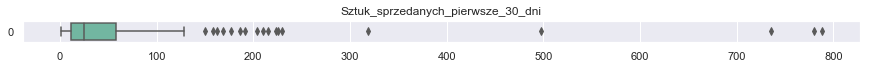

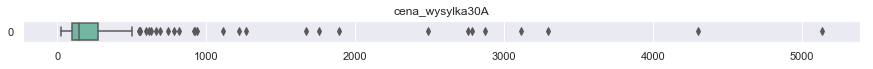

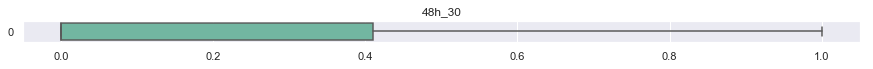

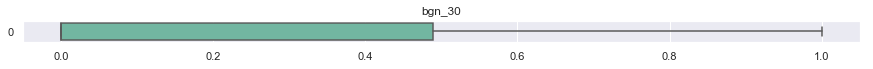

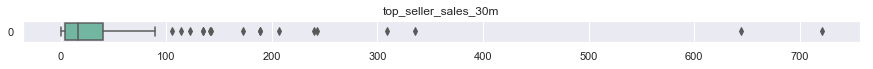

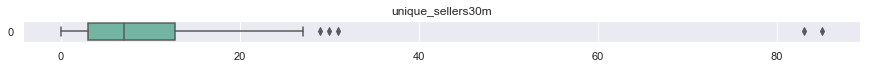

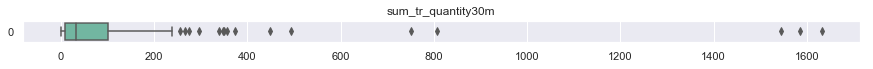

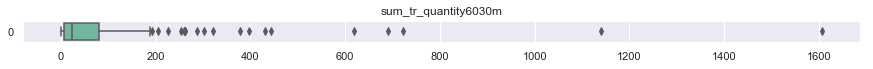

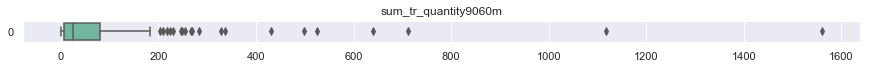

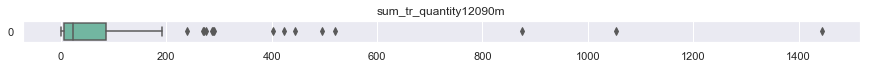

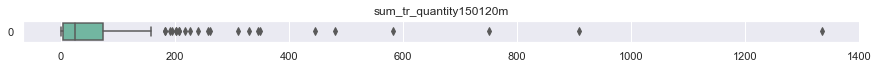

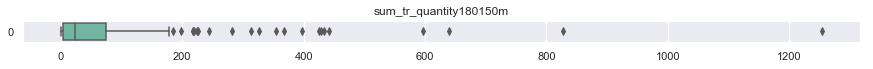

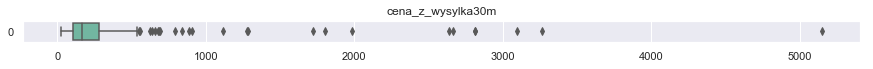

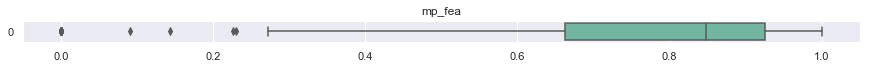

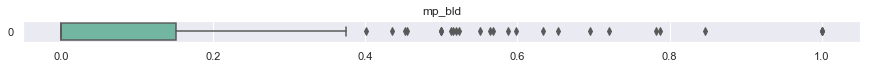

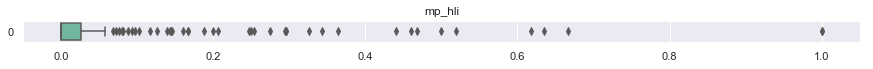

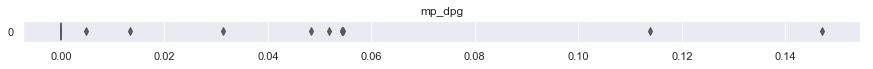

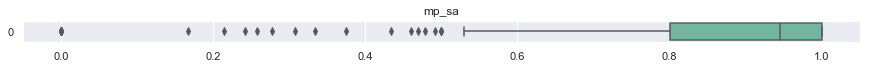

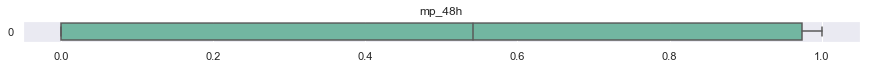

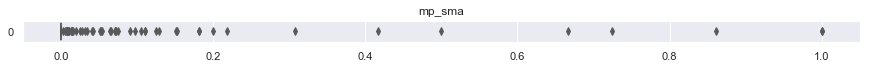

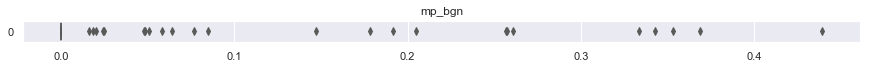

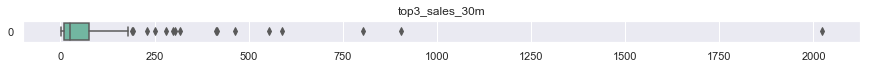

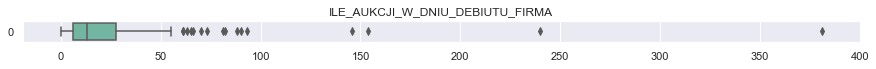

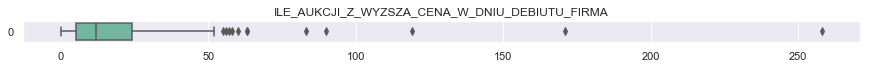

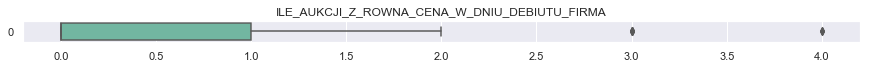

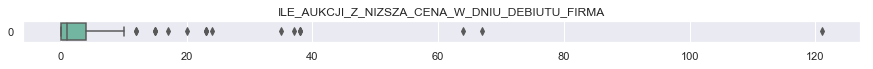

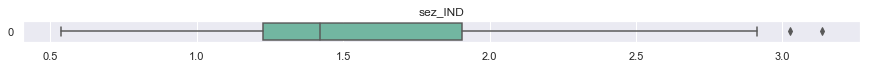

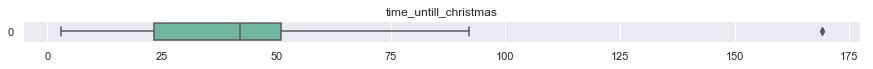

In [11]:
sns.set(rc={'figure.figsize':(15,0.4)})
for feature in df.columns:
    ax = sns.boxplot(data=df[feature], orient="h", palette="Set2")
    ax.set_title(feature)
    plt.show()
    
sns.set(rc={'figure.figsize':(8,8)})

##### Wydaje się, że wszystkie ze zmiennych mogą przynieść jakąś wartość w dalszym modelowaniu. Prawdopodobnie będą wymagały przekształceń na potrzeby modeli liniowych, ale tym zajmiemy się w dalszej części analizy.

Na tym etapie warto się zastanowić, czy nie warto dodać sztucznych zmiennych wynikających z przekształceń innych. Ciekawym wydaje sie stworzenie zmiennej określającej % aukcji z niższą ceną. Informacje potrzebne do stworzenia takiej zmiennej znajdziemy w kolumnach ILE_AUKCJI_W_DNIU_DEBIUTU_FIRMA oraz ILE_AUKCJI_Z_NIZSZA_CENA_W_DNIU_DEBIUTU_FIRMA

In [12]:
# 0 zamieniane na 1 w mianowniku, żeby uniknąć tworzenia braków (0 zamiast NaN)
df['ILE_AUKCJI_Z_NIZSZA_CENA_PROC'] = df['ILE_AUKCJI_Z_NIZSZA_CENA_W_DNIU_DEBIUTU_FIRMA'] / (df['ILE_AUKCJI_W_DNIU_DEBIUTU_FIRMA'].replace(0,1))

Kolejną ciekawym pomysłem jest zsumowanie wszystkich kolumn dotyczących historycznej sprzedaży danego produktu. 

In [13]:
df['total_past_sales'] = \
df['sum_tr_quantity30m'] +\
df['sum_tr_quantity6030m'] +\
df['sum_tr_quantity9060m'] +\
df['sum_tr_quantity12090m'] +\
df['sum_tr_quantity150120m'] +\
df['sum_tr_quantity180150m']

Po usunięciu wszystkich zbędnych kolumn sprawdzamy, czy mamy jakieś braki w danych:

In [14]:
df.isnull().sum()[df.isnull().sum() != 0]

cena_z_wysylka30m    3
mp_fea               3
mp_bld               3
mp_hli               3
mp_dpg               3
mp_sa                3
mp_sma               3
mp_bgn               3
top3_sales_30m       3
dtype: int64

Informacji brakuje tylko w przypadku 3 tych samych rekordów. Warto zastanowić się skąd wynikają te braki, ale na ten moment nie mamy wiedzy potrzebnej, żeby odpowiedzieć na to pytanie.
Wszystkie zmienne z brakami to parametry aukcji - w ich przypadku przypuszczenie, że ich brak wynika z błędu w danych wydaje się słuszne - z tego względu usuniemy 3 obserwacje z brakami.

In [15]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 201
Data columns (total 30 columns):
Sztuk_sprzedanych_pierwsze_30_dni                199 non-null int64
cena_wysylka30A                                  199 non-null float64
48h_30                                           199 non-null float64
bgn_30                                           199 non-null float64
top_seller_sales_30m                             199 non-null int64
unique_sellers30m                                199 non-null int64
sum_tr_quantity30m                               199 non-null int64
sum_tr_quantity6030m                             199 non-null int64
sum_tr_quantity9060m                             199 non-null int64
sum_tr_quantity12090m                            199 non-null int64
sum_tr_quantity150120m                           199 non-null int64
sum_tr_quantity180150m                           199 non-null int64
cena_z_wysylka30m                                199 non-null float64
mp_

Usuneliśmy wszystkie braki, jak i pozbyliśmy się wszystkich zbędnych kolumn. 
#### W naszej tabeli zostało 29 zmiennych objaśniającyh. Każda z nich jest numeryczna.
W następnej częsci analizy (notebook 2) zajmiemy się selekcją zmiennych do dalszego modelowania oraz przekształceniami, jeżeli będzie to konieczne. 

In [16]:
# Zapisz tabele po przekształceniach jako pkl
df.to_pickle('data/data_after_cleaning.pkl')